In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from pydataset import data
import os
import env
import acquire 
import prepare

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

In [3]:
data('iris', show_doc=True)

iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

In [4]:
df_iris = data('iris')
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [5]:
print(df_iris.shape)
print('\n')
print(df_iris.columns)
print('\n')
print(df_iris.info())

(150, 5)


Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
None


In [6]:
print(df_iris['Sepal.Length'].describe())

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: Sepal.Length, dtype: float64


In [7]:
print(df_iris['Sepal.Width'].describe())

count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: Sepal.Width, dtype: float64


In [8]:
print(df_iris['Petal.Length'].describe())

count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: Petal.Length, dtype: float64


In [9]:
print(df_iris['Petal.Width'].describe())

count    150.000000
mean       1.199333
std        0.762238
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: Petal.Width, dtype: float64


In [10]:
df_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


### 5. Read the data from this google sheet into a dataframe, df_google.

In [11]:
url_google = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
url_google = url_google.replace('/edit#gid=', '/export?format=csv&gid=')

In [12]:
df_google = pd.read_csv(url_google)
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [13]:
df_google.shape

(891, 12)

In [14]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
df_google['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [17]:
df_google['Pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [18]:
df_google['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [19]:
df_google['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [20]:
df_google['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [21]:
df_google['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [22]:
df_google.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [23]:
df_google.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [24]:
df_google['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [25]:
df_google[df_google['Name'].str.contains('Rose')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.35,NaN,S


In [26]:
df_google['Sex'].unique()

array(['male', 'female'], dtype=object)

In [27]:
df_google['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [28]:
df_google['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [29]:
df_google['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

### 6. Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.

In [30]:
df_excel = pd.read_excel('train.xlsx')
df_excel

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [31]:
df_excel_sample = df_excel.head(100)
df_excel_sample

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [32]:
df_excel.shape[0]

891

In [33]:
df_excel.columns[:5]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')

In [34]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
df_excel.dtypes[df_excel.dtypes == 'object']

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [36]:
df_excel.columns[df_excel.dtypes == 'object']

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [37]:
df_excel['Pclass'].max() - df_excel['Pclass'].min()

2

In [38]:
df_excel['Age'].max() - df_excel['Age'].min()

79.58

In [39]:
df_excel['Survived'].max() - df_excel['Survived'].min()

1

In [40]:
df_excel['SibSp'].max() - df_excel['SibSp'].min()

8

In [41]:
df_excel['Parch'].max() - df_excel['Parch'].min()

6

In [42]:
df_excel['Fare'].max() - df_excel['Fare'].min()

512.3292

In [43]:
import env
from env import host, username, password

In [44]:
import acquire

In [45]:
titanic = acquire.get_titanic_data()
titanic

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [46]:
titanic.describe()

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


## Data Preparation Exercises

### 1. Using the Iris Data:

In [47]:
iris = acquire.get_iris_data()
iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [48]:
iris.drop(['measurement_id', 'species_id'], axis=1, inplace=True)


In [49]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [50]:
iris = iris.rename(columns={'species_name': 'species'})

In [51]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [52]:
the_dummy = pd.get_dummies(iris[['species']], dummy_na=False, drop_first=True)
the_dummy.head()

,species_versicolor,species_virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [53]:
iris = pd.concat([iris, the_dummy], axis=1)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


In [54]:
def prep_iris(df):
    df = df.drop(['measurement_id', 'species_id'], axis=1)
    df = df.rename(columns={'species_name': 'species'})
    the_dummy = pd.get_dummies(df[['species']], dummy_na=False, drop_first=False)
    df = pd.concat([df, the_dummy], axis=1)
    return df

### 2. Using the Titanic dataset:

In [55]:
titanic = acquire.get_titanic_data()

In [56]:
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [57]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [58]:
titanic.deck.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [59]:
titanic.isna().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
dtype: int64

In [60]:
titanic = titanic.drop(['class', 'deck','age', 'passenger_id','embarked'], axis=1)

In [61]:
titanic.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,female,1,0,71.2833,Cherbourg,0
2,1,3,female,0,0,7.9250,Southampton,1
3,1,1,female,1,0,53.1000,Southampton,0
4,0,3,male,0,0,8.0500,Southampton,1


In [62]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   sibsp        891 non-null    int64  
 4   parch        891 non-null    int64  
 5   fare         891 non-null    float64
 6   embark_town  889 non-null    object 
 7   alone        891 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 62.6+ KB


In [63]:
titanic.describe()

,survived,pclass,sibsp,parch,fare,alone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594,32.204208,0.602694
std,0.486592,0.836071,1.102743,0.806057,49.693429,0.489615
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,8.000000,6.000000,512.329200,1.000000


In [64]:
titanic.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,female,1,0,71.2833,Cherbourg,0
2,1,3,female,0,0,7.9250,Southampton,1
3,1,1,female,1,0,53.1000,Southampton,0
4,0,3,male,0,0,8.0500,Southampton,1


In [65]:
titanic.isna().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embark_town    2
alone          0
dtype: int64

In [66]:
titanic['embark_town'] = titanic['embark_town'].fillna(value='Southhampton') 
# Filled the missing embark town values with most common  value, which was Southampton. 
# Must be done before creating dummy variables or these values will be misssed.

In [67]:
titanic.isna().sum() # no more null values. operation was a success.

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embark_town    0
alone          0
dtype: int64

**2c. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.**

In [68]:
titanic.info() # Looking for Object(categorical) Dtypes to convert into countable values for the
# machine learning algorithym. Using get_dummies

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   sibsp        891 non-null    int64  
 4   parch        891 non-null    int64  
 5   fare         891 non-null    float64
 6   embark_town  891 non-null    object 
 7   alone        891 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 62.6+ KB


In [69]:
them_dummies = pd.get_dummies(titanic[['sex', 'embark_town']], dummy_na=False, drop_first=True)

In [70]:
them_dummies

,sex_male,embark_town_Queenstown,embark_town_Southampton,embark_town_Southhampton
0,1,0,1,0
1,0,0,0,0
2,0,0,1,0
3,0,0,1,0
4,1,0,1,0
...,...,...,...,...
886,1,0,1,0
887,0,0,1,0
888,0,0,1,0
889,1,0,0,0


In [71]:
# Going to join the dummy dataframe to the titanic dataframe
titanic = pd.concat([titanic, them_dummies], axis=1)

In [72]:
titanic

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,embark_town_Southhampton
0,0,3,male,1,0,7.2500,Southampton,0,1,0,1,0
1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,0,0,1,0
3,1,1,female,1,0,53.1000,Southampton,0,0,0,1,0
4,0,3,male,0,0,8.0500,Southampton,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Southampton,1,1,0,1,0
887,1,1,female,0,0,30.0000,Southampton,1,0,0,1,0
888,0,3,female,1,2,23.4500,Southampton,0,0,0,1,0
889,1,1,male,0,0,30.0000,Cherbourg,1,1,0,0,0


**2d. Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.**

In [140]:
def prep_titanic(titanic):
    titanic= titanic.drop(['class', 'deck','age', 'passenger_id','embarked'], axis=1)
    titanic['embark_town'] = titanic['embark_town'].fillna(value='Southhampton')
    them_dummies = pd.get_dummies(titanic[['sex', 'embark_town']], dummy_na=False)
    titanic = pd.concat([titanic, them_dummies], axis=1)
    return titanic
    

## Using the Telco dataset:

In [74]:
telco = acquire.get_telco_data()
telco.head() # getting an overview of the data

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [75]:
telco.shape

(7043, 24)

In [76]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [77]:
telco.describe()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692
std,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


In [78]:
telco = telco.drop_duplicates() # dropping duplicates

In [79]:
telco.shape

(7043, 24)

In [80]:
# Looking for columns to drop.
telco.head(3)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check


In [81]:
# Dropped Unnamed:0, customer id, payment type id, internet service type id, and contract type id. 
# Will create dummies for these columns.
telco = telco.drop(['customer_id','payment_type_id','internet_service_type_id', 'contract_type_id'], axis=1)

In [82]:
telco

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,No,No,13,Yes,No,Yes,No,No,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,Male,0,Yes,No,22,Yes,Yes,No,No,No,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,Male,0,No,No,2,Yes,No,No,Yes,No,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,Male,0,Yes,Yes,67,Yes,No,Yes,No,Yes,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [83]:
# No nulls to account for. Next, get dummy values.
telco.isna().sum()

gender                   0
senior_citizen           0
partner                  0
dependents               0
tenure                   0
phone_service            0
multiple_lines           0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
paperless_billing        0
monthly_charges          0
total_charges            0
churn                    0
contract_type            0
internet_service_type    0
payment_type             0
dtype: int64

In [84]:
cat_columns = []
num_columns = []
mult_cats = []
for col in telco.columns:
    if telco[col].dtype == 'object':
        cat_columns.append(col)
        if telco[col].value_counts().size > 2:
            mult_cats.append(col)
    else:
        num_columns.append(col)

In [85]:
cat_columns

['gender',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [86]:
# create the dummies
telco_dummies = pd.get_dummies(telco[['contract_type','internet_service_type','payment_type']], dummy_na=False)

In [87]:
telco_dummies.head()

,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,1,0,1,0,0,0,0,0,1
1,1,0,0,1,0,0,0,0,0,1
2,1,0,0,0,1,0,0,0,1,0
3,1,0,0,0,1,0,0,0,1,0
4,1,0,0,0,1,0,0,0,0,1


In [88]:
# add dummy dataframe to main dataframe
telco = pd.concat([telco, telco_dummies], axis=1)

In [89]:
telco.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,0,1,0,1,0,0,0,0,0,1
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,1,0,0,1,0,0,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,1,0,0,0,1,0,0,0,1,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,1,0,0,0,1,0,0,0,1,0
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,1,0,0,0,1,0,0,0,0,1


In [90]:
def prep_telco(telco):
    telco = telco.drop_duplicates()
    telco = telco.drop(['Unnamed: 0', 'customer_id','payment_type_id','internet_service_type_id', 'contract_type_id'], axis=1)
    telco_dummies = pd.get_dummies(telco[['contract_type','internet_service_type','payment_type']], dummy_na=False)
    telco = pd.concat([telco, telco_dummies], axis=1)
    return telco
    
    

## Split your data

In [91]:
train, test = train_test_split(telco, test_size=0.2, random_state=123, stratify=telco.churn)

In [92]:
train.shape, test.shape

((5634, 30), (1409, 30))

In [93]:
train, validate = train_test_split(train, train_size = 0.7, random_state = 123, stratify=train.churn)

In [94]:
train.shape, validate.shape, test.shape

((3943, 30), (1691, 30), (1409, 30))

In [95]:
def split_data(df, target= 'enter target column here'):
    train, test = train_test_split(df, test_size=0.2, random_state=123, stratify=df[target])
    train, validate = train_test_split(train, train_size = 0.7, random_state = 123, stratify=train[target])
    return train, validate, test
    
    

In [96]:
iris_new = acquire.get_iris_data()
iris_new.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [97]:
iris_prep = prep_iris(iris_new)
iris_prep.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


In [98]:
train, validate, test =split_data(iris_prep, target='species')

In [99]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
79,5.7,2.6,3.5,1.0,versicolor,0,1,0
36,5.5,3.5,1.3,0.2,setosa,1,0,0
133,6.3,2.8,5.1,1.5,virginica,0,0,1
95,5.7,3.0,4.2,1.2,versicolor,0,1,0
18,5.7,3.8,1.7,0.3,setosa,1,0,0


In [100]:
validate.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
134,6.1,2.6,5.6,1.4,virginica,0,0,1
62,6.0,2.2,4.0,1.0,versicolor,0,1,0
98,5.1,2.5,3.0,1.1,versicolor,0,1,0
66,5.6,3.0,4.5,1.5,versicolor,0,1,0
121,5.6,2.8,4.9,2.0,virginica,0,0,1


# Exploratory Analysis

### Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

#### 1. Acquire, prepare & split your data.



In [101]:
iris_explore = acquire.get_iris_data()

In [102]:
iris_explore.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [103]:
# Clean the data
iris_explore = prep_iris(iris_explore)
iris_explore.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


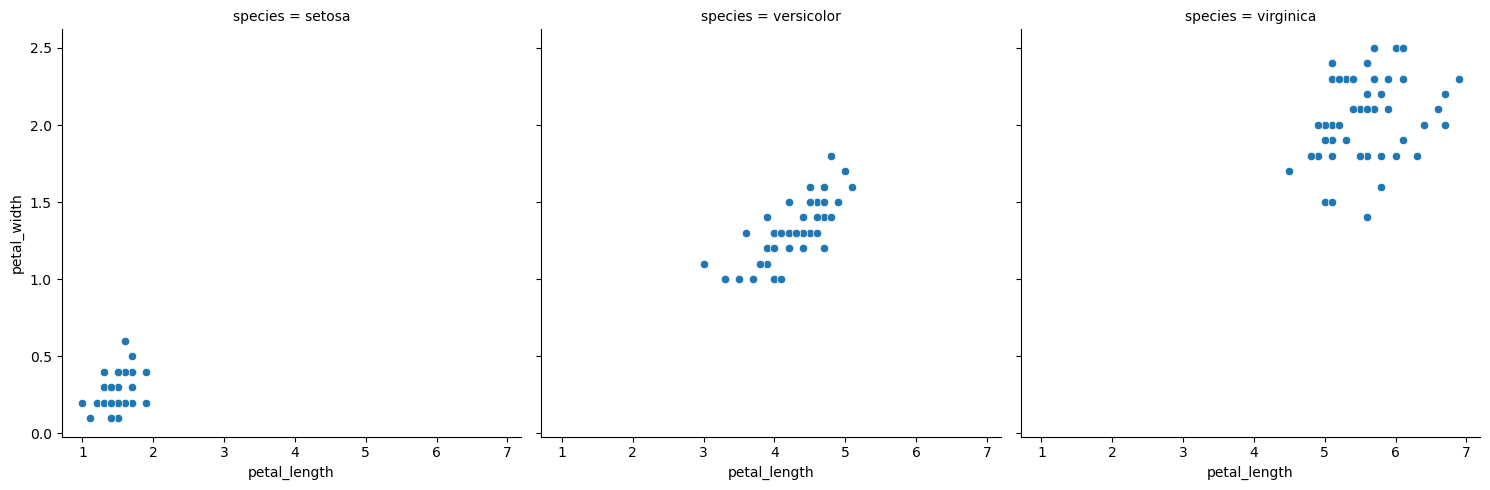

In [104]:
sns.relplot(x='petal_length', y='petal_width',data=iris_explore, col='species')

In [105]:
train,validate,test = split_data(df=iris_explore, target='species_versicolor')

In [106]:
train.shape, validate.shape, test.shape

((84, 8), (36, 8), (30, 8))

In [107]:
# Even proportion of means across the stratified target.
train.species_versicolor.mean(), validate.species_versicolor.mean(), test.species_versicolor.mean()

(0.3333333333333333, 0.3333333333333333, 0.3333333333333333)

#### 2. Univariate Stats

In [108]:
print('Petal Length')
print(iris_explore.petal_length.describe())
print('---------------------------')
print('Petal Width')
print(iris_explore.petal_width.describe())

Petal Length
count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal_length, dtype: float64
---------------------------
Petal Width
count    150.000000
mean       1.199333
std        0.762238
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal_width, dtype: float64


In [109]:
print('Versicolor Petal Length Mean')
print(iris_explore[iris['species_versicolor'] ==0]['petal_length'].mean())
print('--------------\n')
print('Virginica Petal Length Mean')
print(iris_explore[iris['species_virginica'] ==0]['petal_length'].mean())

Versicolor Petal Length Mean
3.507000000000001
--------------

Virginica Petal Length Mean
2.861


<AxesSubplot:>

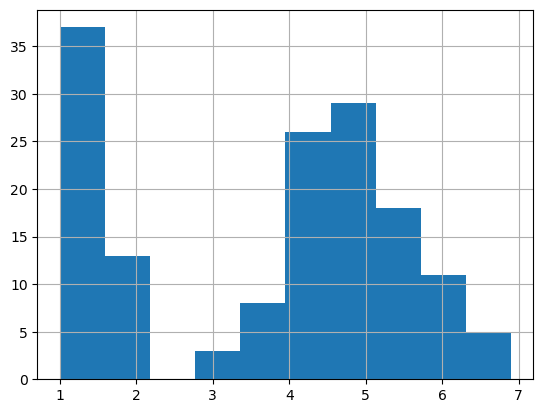

In [110]:
iris_explore.petal_length.hist()

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

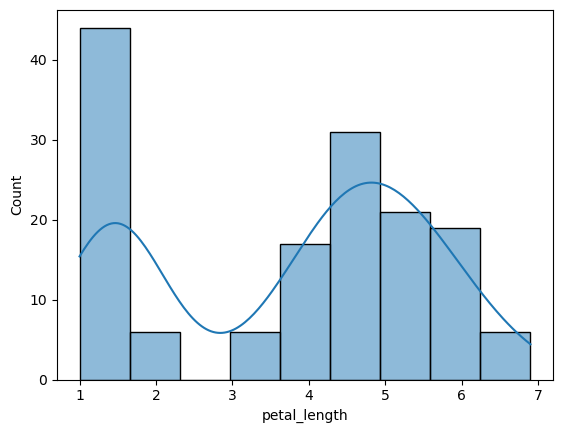

In [111]:
sns.histplot(iris_explore.petal_length, kde=True )

<AxesSubplot:xlabel='petal_length'>

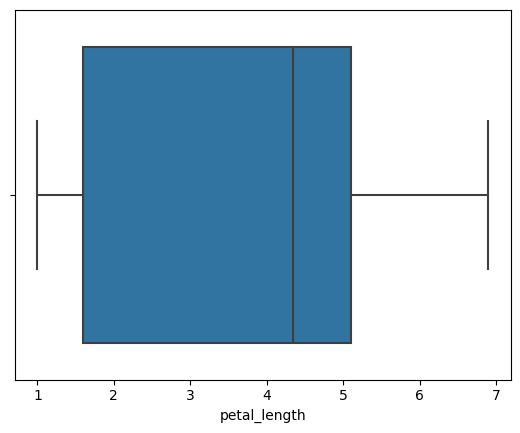

In [112]:
sns.boxplot(iris_explore.petal_length)

In [113]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 96 to 28
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length        84 non-null     float64
 1   sepal_width         84 non-null     float64
 2   petal_length        84 non-null     float64
 3   petal_width         84 non-null     float64
 4   species             84 non-null     object 
 5   species_setosa      84 non-null     uint8  
 6   species_versicolor  84 non-null     uint8  
 7   species_virginica   84 non-null     uint8  
dtypes: float64(4), object(1), uint8(3)
memory usage: 4.2+ KB


In [114]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sepal_length,84.0,NaN,NaN,NaN,5.833333,0.832666,4.3,5.1,5.8,6.4,7.9
sepal_width,84.0,NaN,NaN,NaN,3.069048,0.467234,2.0,2.8,3.0,3.3,4.4
petal_length,84.0,NaN,NaN,NaN,3.739286,1.76908,1.0,1.6,4.3,5.1,6.7
petal_width,84.0,NaN,NaN,NaN,1.216667,0.76644,0.1,0.4,1.3,1.8,2.5
species,84,3,versicolor,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
species_setosa,84.0,NaN,NaN,NaN,0.333333,0.474236,0.0,0.0,0.0,1.0,1.0
species_versicolor,84.0,NaN,NaN,NaN,0.333333,0.474236,0.0,0.0,0.0,1.0,1.0
species_virginica,84.0,NaN,NaN,NaN,0.333333,0.474236,0.0,0.0,0.0,1.0,1.0


In [115]:
spec_versi = iris_explore[iris_explore['species_versicolor'] == 1]
spec_versi.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
50,7.0,3.2,4.7,1.4,versicolor,0,1,0
51,6.4,3.2,4.5,1.5,versicolor,0,1,0
52,6.9,3.1,4.9,1.5,versicolor,0,1,0
53,5.5,2.3,4.0,1.3,versicolor,0,1,0
54,6.5,2.8,4.6,1.5,versicolor,0,1,0


## Bivariate Stats

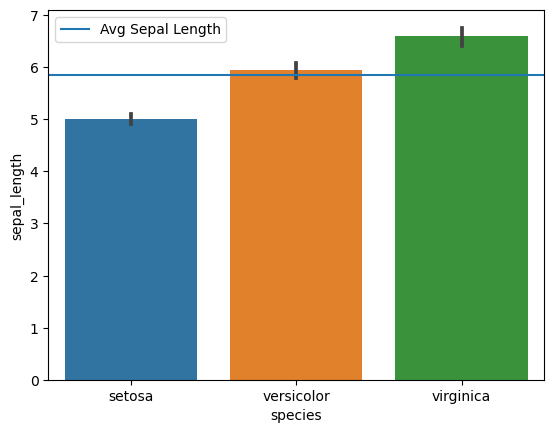

In [116]:

sns.barplot(x='species', y='sepal_length', data=iris_explore)
sepal_len_mean = iris_explore.sepal_length.mean()
plt.axhline(sepal_len_mean, label='Avg Sepal Length')
plt.legend()

In [117]:
print('Versicolor Described')
print(iris_explore[iris_explore['species_versicolor'] == 1]['sepal_length'].describe())
print('----------------------\n')
print('Virginica Described')
print(iris_explore[iris_explore['species_virginica'] == 1]['sepal_length'].describe())

Versicolor Described
count    50.000000
mean      5.936000
std       0.516171
min       4.900000
25%       5.600000
50%       5.900000
75%       6.300000
max       7.000000
Name: sepal_length, dtype: float64
----------------------

Virginica Described
count    50.00000
mean      6.58800
std       0.63588
min       4.90000
25%       6.22500
50%       6.50000
75%       6.90000
max       7.90000
Name: sepal_length, dtype: float64


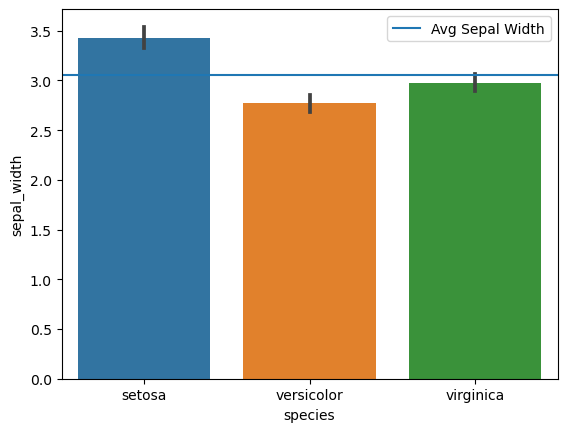

In [118]:

sns.barplot(x='species', y='sepal_width', data=iris_explore)
sepal_width_mean = iris_explore.sepal_width.mean()
plt.axhline(sepal_width_mean, label='Avg Sepal Width')
plt.legend()

In [119]:
print('Versicolor Described')
print(iris_explore[iris_explore['species_versicolor'] == 1]['sepal_width'].describe())
print('----------------------\n')
print('Virginica Described')
print(iris_explore[iris_explore['species_virginica'] == 1]['sepal_width'].describe())

Versicolor Described
count    50.000000
mean      2.770000
std       0.313798
min       2.000000
25%       2.525000
50%       2.800000
75%       3.000000
max       3.400000
Name: sepal_width, dtype: float64
----------------------

Virginica Described
count    50.000000
mean      2.974000
std       0.322497
min       2.200000
25%       2.800000
50%       3.000000
75%       3.175000
max       3.800000
Name: sepal_width, dtype: float64


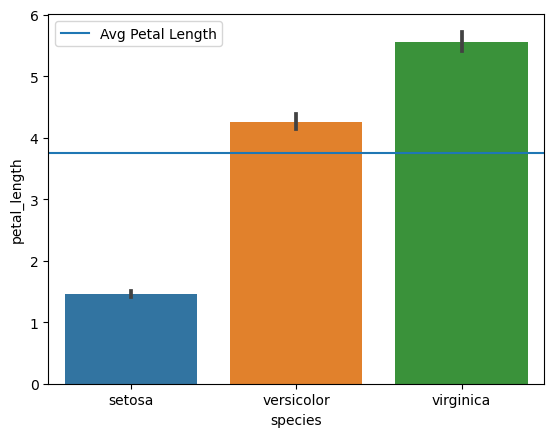

In [120]:
sns.barplot(x='species', y='petal_length', data=iris_explore)
petal_length_mean = iris_explore.petal_length.mean()
plt.axhline(petal_length_mean, label='Avg Petal Length')
plt.legend()

In [121]:
print('Versicolor Described')
print(iris_explore[iris_explore['species_versicolor'] == 1]['petal_length'].describe())
print('----------------------\n')
print('Virginica Described')
print(iris_explore[iris_explore['species_virginica'] == 1]['petal_length'].describe())

Versicolor Described
count    50.000000
mean      4.260000
std       0.469911
min       3.000000
25%       4.000000
50%       4.350000
75%       4.600000
max       5.100000
Name: petal_length, dtype: float64
----------------------

Virginica Described
count    50.000000
mean      5.552000
std       0.551895
min       4.500000
25%       5.100000
50%       5.550000
75%       5.875000
max       6.900000
Name: petal_length, dtype: float64


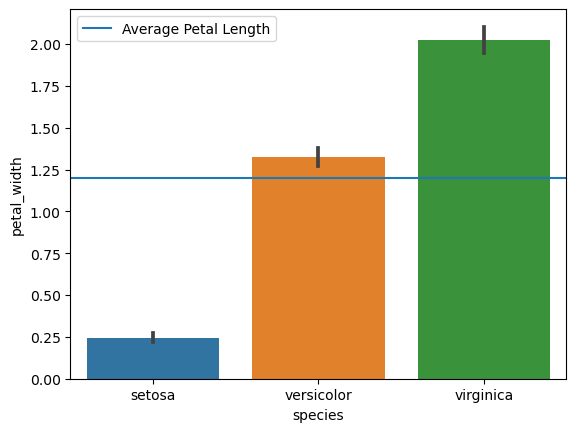

In [122]:
sns.barplot(x='species', y='petal_width', data=iris_explore)
petal_width_mean = iris_explore.petal_width.mean()
plt.axhline(petal_width_mean, label='Average Petal Length')
plt.legend()

In [123]:
print('Versicolor Described')
print(iris_explore[iris_explore['species_versicolor'] == 1]['petal_width'].describe())
print('----------------------\n')
print('Virginica Described')
print(iris_explore[iris_explore['species_virginica'] == 1]['petal_width'].describe())

Versicolor Described
count    50.000000
mean      1.326000
std       0.197753
min       1.000000
25%       1.200000
50%       1.300000
75%       1.500000
max       1.800000
Name: petal_width, dtype: float64
----------------------

Virginica Described
count    50.00000
mean      2.02600
std       0.27465
min       1.40000
25%       1.80000
50%       2.00000
75%       2.30000
max       2.50000
Name: petal_width, dtype: float64


In [124]:
iris_explore[iris_explore['species_versicolor'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,50.0,5.936,0.516171,4.9,5.600,5.90,6.3,7.0
sepal_width,50.0,2.770,0.313798,2.0,2.525,2.80,3.0,3.4
petal_length,50.0,4.260,0.469911,3.0,4.000,4.35,4.6,5.1
petal_width,50.0,1.326,0.197753,1.0,1.200,1.30,1.5,1.8
species_setosa,50.0,0.000,0.000000,0.0,0.000,0.00,0.0,0.0
species_versicolor,50.0,1.000,0.000000,1.0,1.000,1.00,1.0,1.0
species_virginica,50.0,0.000,0.000000,0.0,0.000,0.00,0.0,0.0


In [125]:
versi_mean = iris_explore[iris_explore['species_versicolor']==1]['petal_width']
versi_mean.head()

50    1.4
51    1.5
52    1.5
53    1.3
54    1.5
Name: petal_width, dtype: float64

In [126]:
virgi_mean = iris_explore[iris_explore['species_virginica']==1]['petal_width']
virgi_mean.head()

100    2.5
101    1.9
102    2.1
103    1.8
104    2.2
Name: petal_width, dtype: float64

In [127]:
stats.mannwhitneyu(versi_mean,virgi_mean)

MannwhitneyuResult(statistic=49.0, pvalue=9.698045444914185e-17)

## Multivariate Stats

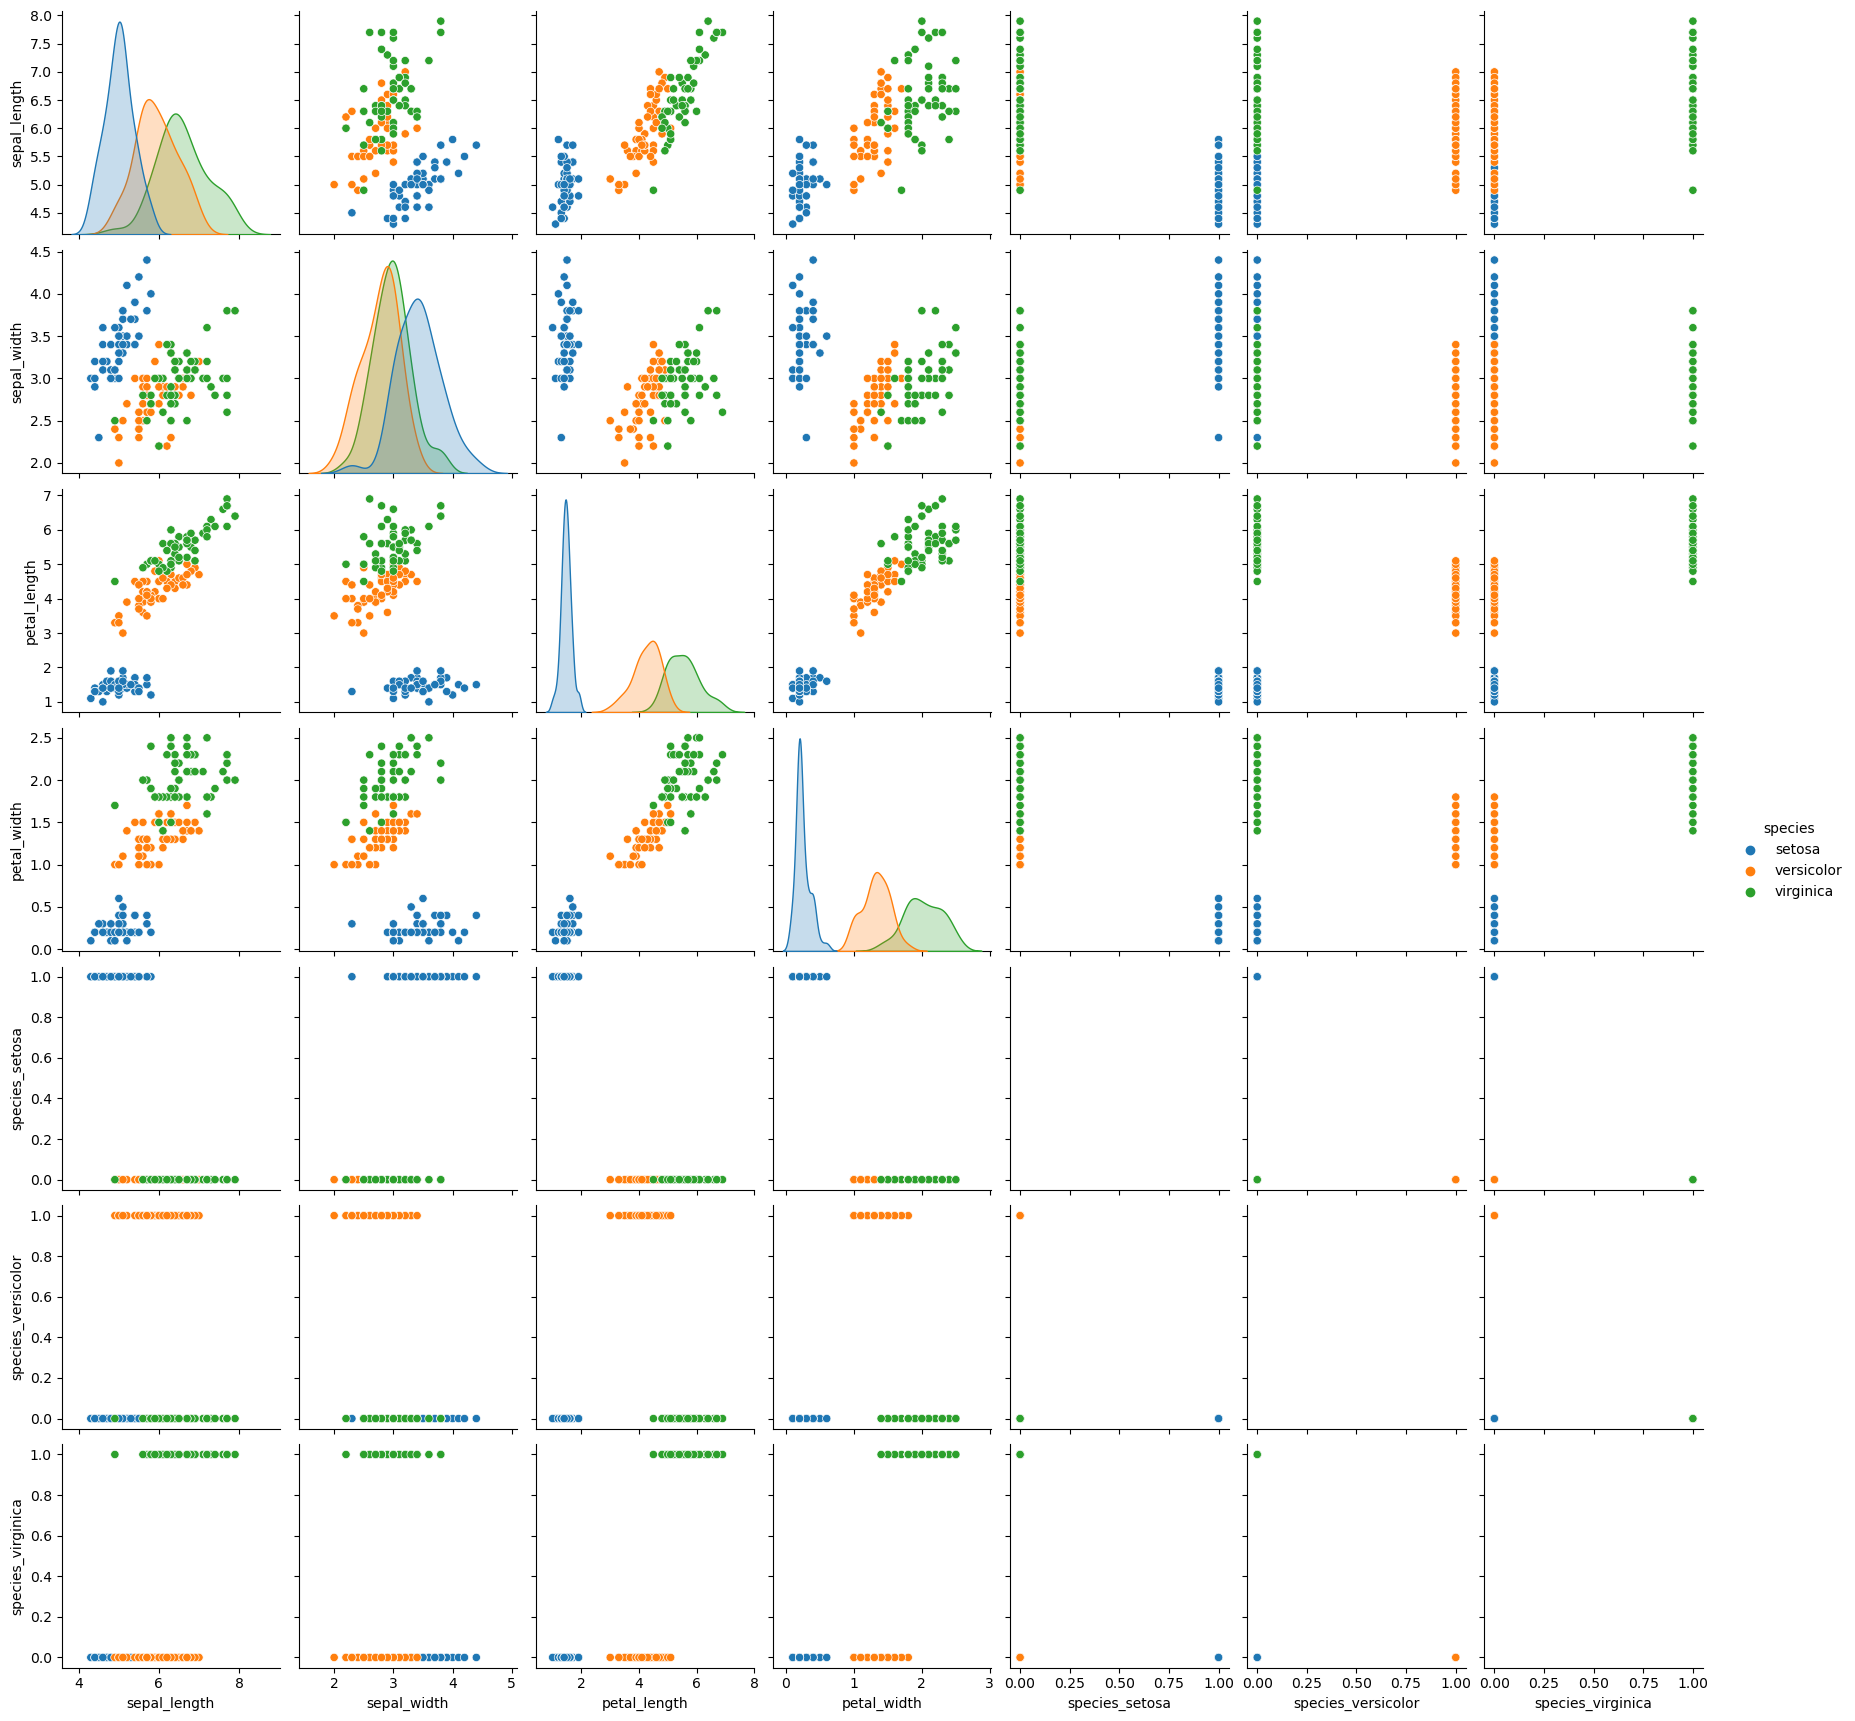

In [128]:
# WAY TOO BUSY, but cool colors
sns.pairplot(iris_explore, hue='species')


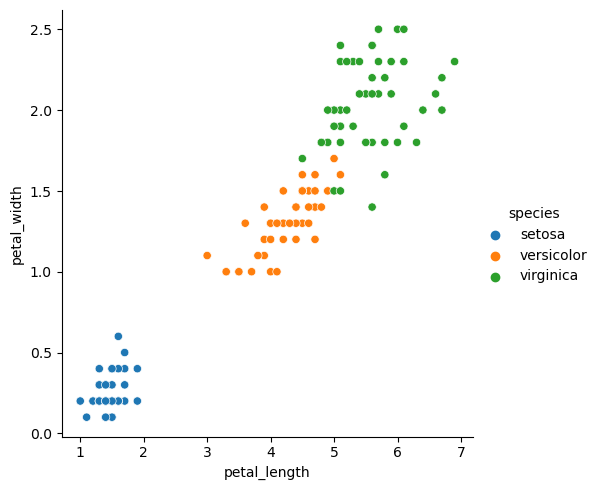

In [129]:
sns.relplot(x='petal_length', y='petal_width', hue='species', data=iris_explore)

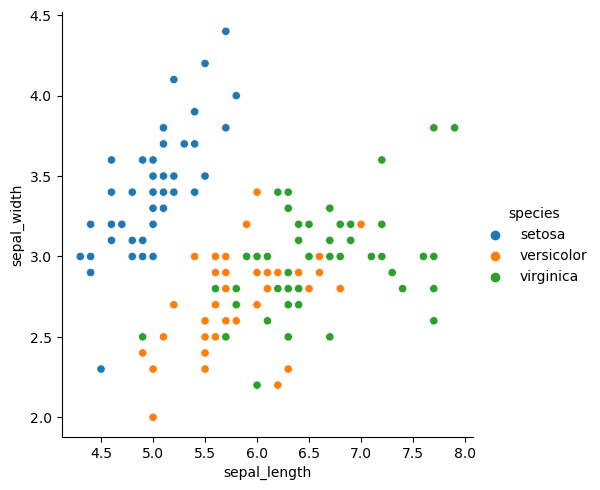

In [130]:
sns.relplot(x='sepal_length', y='sepal_width', hue='species', data=iris_explore)

In [131]:
melted = iris_explore.melt(id_vars='species')
melted

,species,variable,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0
...,...,...,...
1045,virginica,species_virginica,1.0
1046,virginica,species_virginica,1.0
1047,virginica,species_virginica,1.0
1048,virginica,species_virginica,1.0


<AxesSubplot:xlabel='species', ylabel='value'>

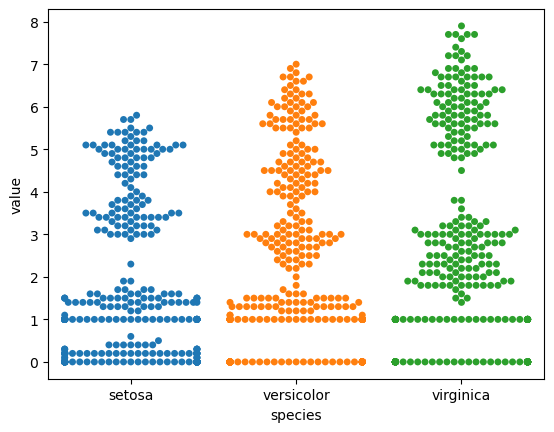

In [132]:
sns.swarmplot(x='species', y='value',data=melted) 

<AxesSubplot:xlabel='species', ylabel='value'>

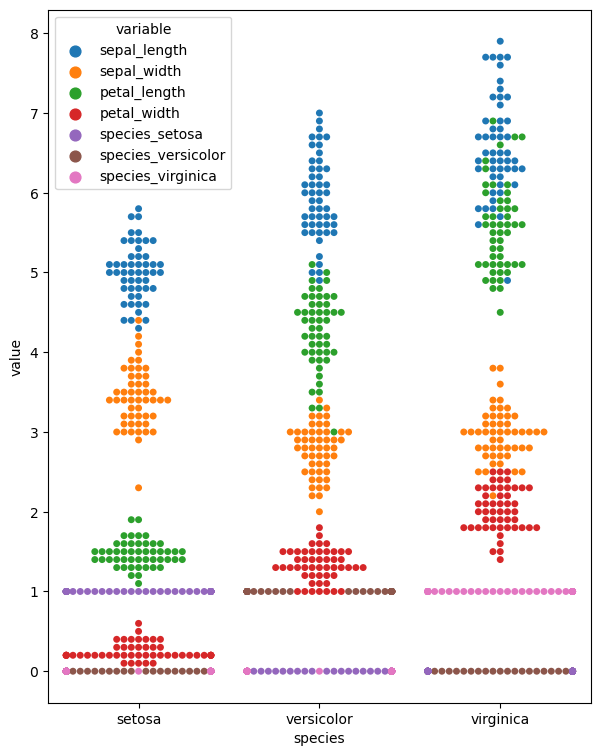

In [133]:
plt.figure(figsize=(7,9))
sns.swarmplot(x='species', y='value',data=melted, hue='variable') 

Is the petal length between Setosa and Virginica significantly different?

<AxesSubplot:>

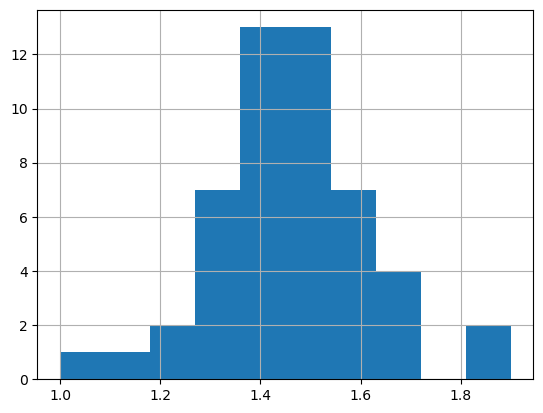

In [134]:
h_setosa =iris_explore[iris_explore['species_setosa'] ==1]['petal_length'].hist()
h_setosa

#normalish distrubtion.

<AxesSubplot:>

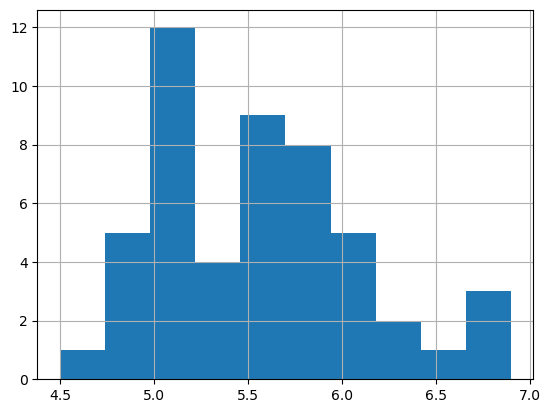

In [135]:
h_virginica = iris_explore[iris_explore['species_virginica'] ==1]['petal_length'].hist()
h_virginica

#normalish distribution

In [136]:
t_setosa = iris_explore[iris_explore['species_setosa'] ==1]['petal_length']
t_virginica = iris_explore[iris_explore['species_virginica'] ==1]['petal_length']
alpha = 0.05

H_0: No difference in means between Setosa and Virginica

H_a: There is a significat difference between Setosa and Virginica

In [137]:
stats.ttest_ind(t_setosa, t_virginica)

Ttest_indResult(statistic=-49.98618625709594, pvalue=1.5048006992427275e-71)

Confidently say that there is a significant difference between Setosa and Virginica

# Part II EDA Exercises

## Explore the Titanic dataset more completely

### Of those that survived, is it more likely that they were female with children?

In [149]:
titan = acquire.get_titanic_data()
titan.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [150]:
titan = prep_titanic(titan)
titan.head()


,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_Southhampton
0,0,3,male,1,0,7.2500,Southampton,0,0,1,0,0,1,0
1,1,1,female,1,0,71.2833,Cherbourg,0,1,0,1,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,1,0,0,0,1,0
3,1,1,female,1,0,53.1000,Southampton,0,1,0,0,0,1,0
4,0,3,male,0,0,8.0500,Southampton,1,0,1,0,0,1,0


In [151]:
titan.isna().sum()

survived                    0
pclass                      0
sex                         0
sibsp                       0
parch                       0
fare                        0
embark_town                 0
alone                       0
sex_female                  0
sex_male                    0
embark_town_Cherbourg       0
embark_town_Queenstown      0
embark_town_Southampton     0
embark_town_Southhampton    0
dtype: int64

In [177]:
train, validate, test = split_data(df=titan, target='survived')


In [179]:
train.shape, validate.shape, test.shape

((498, 14), (214, 14), (179, 14))

In [184]:
train

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_Southhampton
583,0,1,male,0,0,40.1250,Cherbourg,1,0,1,1,0,0,0
165,1,3,male,0,2,20.5250,Southampton,0,0,1,0,0,1,0
50,0,3,male,4,1,39.6875,Southampton,0,0,1,0,0,1,0
259,1,2,female,0,1,26.0000,Southampton,0,1,0,0,0,1,0
306,1,1,female,0,0,110.8833,Cherbourg,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,0,3,male,0,0,7.8958,Southampton,1,0,1,0,0,1,0
636,0,3,male,0,0,7.9250,Southampton,1,0,1,0,0,1,0
222,0,3,male,0,0,8.0500,Southampton,1,0,1,0,0,1,0
485,0,3,female,3,1,25.4667,Southampton,0,1,0,0,0,1,0


**Should I combine some columns together?(question: of those that survived, were they more likely to be female with children? And of what class?)**

In [161]:
female_child = titan[titan['sex']=='female']['parch'] > 0

In [163]:
female_child.value_counts()

False    194
True     120
Name: parch, dtype: int64

In [181]:
survived = titan[(titan['survived'] == 1) & (titan['sex']=='female')] 
survived.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_Southhampton
1,1,1,female,1,0,71.2833,Cherbourg,0,1,0,1,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,1,0,0,0,1,0
3,1,1,female,1,0,53.1000,Southampton,0,1,0,0,0,1,0
8,1,3,female,0,2,11.1333,Southampton,0,1,0,0,0,1,0
9,1,2,female,1,0,30.0708,Cherbourg,0,1,0,1,0,0,0


In [182]:
did_not = titan[(titan['survived'] ==0) & (titan['sex']=='female')]
did_not.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_Southhampton
14,0,3,female,0,0,7.8542,Southampton,1,1,0,0,0,1,0
18,0,3,female,1,0,18.0000,Southampton,0,1,0,0,0,1,0
24,0,3,female,3,1,21.0750,Southampton,0,1,0,0,0,1,0
38,0,3,female,2,0,18.0000,Southampton,0,1,0,0,0,1,0
40,0,3,female,1,0,9.4750,Southampton,0,1,0,0,0,1,0


In [183]:
survived.shape[0], did_not.shape[0]

(233, 81)